# Kendall's$-\tau$ Distance

In this Notebook, we will introduce an implementation of Kendall's$-\tau$ distance using merge sort algorithm. Then, we compare it with a naive implementation with a time complexity equal to $O(n^2)$. The implementation can be found in the package [mallows_kendall](https://github.com/ekhiru/top-k-mallows/blob/master/mallows_kendall.py). 

In [1]:
import time
import mallows_kendall as mk
import itertools as it
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

Let $A$ and $B$ be two permutations with the same size, the following function computes Kendall's$-\tau$ distance in $O(n^2)$ in the worst case. We will use it as a benchmarking algorithm.

In [2]:
def kendall_tau(A, B=None):
    """This function computes the kendall's-tau distance between two permutations.
    If only one permutation is given, the distance will be computed with the
    identity permutation as the second permutation
        Parameters
        ----------
        A: ndarray
            The first permutation
        B: ndarray, optionnal
            The second permutation (default is None)
        Returns
        -------
        int
            The kendall's-tau distances between both permutations
    """
    if B is None : B = list(range(len(A)))
    n = len(A)
    pairs = it.combinations(range(n), 2)
    distance = 0
    for x, y in pairs:
        a = A[x] - A[y]
        try:
            b = B[x] - B[y]
        except:
            print("ERROR kendall_tau, check b",A, B, x, y)
        if (a * b < 0):
            distance += 1
    return distance


## 1. Performance comparison

### 1.1 Complete permutations

Firstly, we compare these algorithms using two permutations of different sizes. Both permutations don't contain missing values. The next figure shows the performance of each algorithm as the length of permutations increases.

In [3]:
def genCompPermutations(n=10): # Generate 2 complete permutations
    A = np.random.permutation(n)
    B = np.random.permutation(n)
    return A, B

In [4]:
lst = []
def Kendall():

    for n in range(2, 10003, 1000):
        for rep in range(10):
            
            A, B = genCompPermutations(n)

            start_time = time.time()
            c1 = mk.distance(np.array(B), np.array(A)) # Merge sort
            end_time = time.time()
            t = end_time - start_time
            algo = "Merge sort"
            
            lst.append([n, t, algo])
            
            start_time = time.time()
            c2 = kendall_tau(A,B) # Naive
            end_time = time.time()
            t = end_time - start_time
            algo = "Naive"

            lst.append([n, t, algo])
    return lst
            
lst = Kendall()

In [5]:
import matplotlib.pyplot as plt

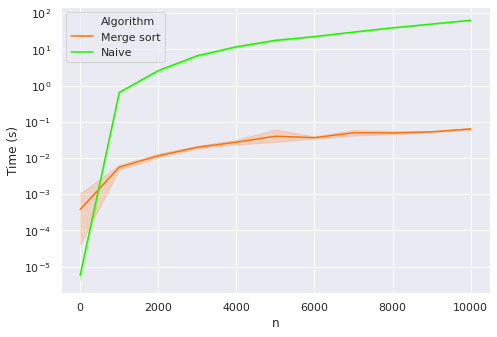

In [7]:
sns.set(rc={'figure.figsize':(7.7,5.27)})
dataframe = pd.DataFrame(lst, columns=[ "n", "Time (s)", "Algorithm"])

line = sns.lineplot(data=dataframe, x="n", y="Time (s)",hue="Algorithm", 
                    palette = sns.color_palette("gist_ncar_r", len(dataframe["Algorithm"].drop_duplicates())))
line.set_yscale('log')

### 1.2 Partial permutations

The implemented algorithm is adapted with partial permutations as well, i.e. the permutations with missing values. The plot below compares both algorithms when one of the permutations at least is partial.

In [8]:
v = .4  # Control the number of missing values in each permutations (0< v <1)

In [9]:
def genPartPermutations(n=10, v=.5, phi=.9): # Generate 2 complete permutations
    A, B = mk.sample(m=2, n=n, k=int((1-v)*n), phi=phi, s0=np.array(range(n)))

    return A, B

In [10]:
lst = []
def Kendall(v):
    for n in range(2, 1003, 100): 
        for rep in range(10):

            A, B = genPartPermutations(n, v)

            start_time = time.time()
            c1 = kendall_tau(np.array(B), np.array(A)) # Naive
            end_time = time.time()

            t = end_time - start_time
            algo = "Naive"
            lst.append([n, t, algo])

            start_time = time.time()
            c2 = mk.distance(A,B)# Merge sort
            end_time = time.time()

            t = end_time - start_time
            algo = "Merge sort"
            lst.append([n, t, algo])
    return lst

In [11]:
lst = Kendall(v)

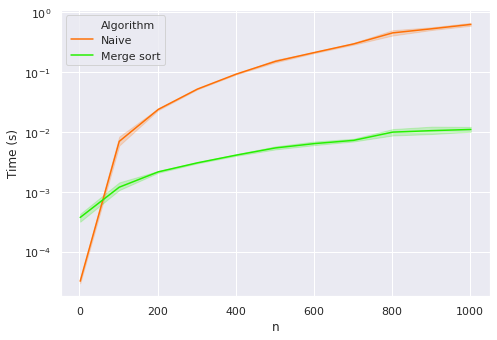

In [12]:
sns.set(rc={'figure.figsize':(7.7,5.27)})
dataframe = pd.DataFrame(lst, columns=[ "n", "Time (s)", "Algorithm"])

line = sns.lineplot(data=dataframe, x="n", y="Time (s)",hue="Algorithm", 
                    palette = sns.color_palette("gist_ncar_r", len(dataframe["Algorithm"].drop_duplicates())))
line.set_yscale('log')

When $n = 1.000.000$, the merge sort based algorithm runs in about $10$ seconds for complete permutations. Whereas, the naive algorithm tends to infinity in the same conditions. In addition, with the same value of $n$, the algorithm runs faster for partial permutations dependently on the number of missing values it has (more missing values speed up the process). The following two cells show its performance in the case of complete permutations.

In [28]:
n=1000000
A, B = genCompPermutations(n)

In [29]:
%%time
mk.distance(A,B)

CPU times: user 8.63 s, sys: 228 ms, total: 8.86 s
Wall time: 8.86 s


249723789598